# Predicting Solar Flares

Solar flares, which are powerful bursts of energy from the sun that can disrupt technology on Earth.

These flares happen when the Sun's magnetic field lines, which are like invisible rubber bands, get twisted and tangled. This build-up of magnetic energy eventually becomes unstable and is released explosively, similar to a rubber band snapping when twisted too far. This energy heats the Sun's atmosphere to millions of degrees and accelerates particles to near the speed of light, creating the intense burst of radiation.

While Earth's atmosphere and magnetic field protect us from most of the harmful effects of solar flares, the radiation they emit can still cause some trouble.

The X-rays and extreme ultraviolet radiation from flares can disturb Earth's ionosphere, a layer that reflects radio waves. This can lead to radio blackouts and disruptions in navigation systems like GPS. The intense radiation can also damage satellites, affecting communication, navigation, and weather forecasting.  It can also increase drag on satellites in low Earth orbit, shortening their lifespan. In extreme cases, very strong flares can induce electrical currents in power grids, potentially causing widespread blackouts.

Predicting solar flares gives us a crucial heads-up, allowing us to take protective measures before their effects hit Earth. Satellites can be reoriented to minimise the surface area exposed to the radiation.  Sensitive instruments can be powered down. 
 
The Solar Dynamics Observatory (SDO) is a NASA satellite launched in 2010 to study the Sun. SDO captures images of the Sun's atmosphere, measures its magnetic field, and tracks solar flares and other activity.

NASA make this data available. This project aims to predict the occurance of flares using it.

The features in the data set are:
- ABSNJZH - Absolute value of the net magnetic flux in the vertical component.
- AREA_ACR - The area of the active region in millionths of a solar hemisphere.
- EPSX, EPSY, EPSZ - Electric current helicity in the east-west, north-south, and vertical directions.
- Latitude - The angular distance on the Sun's surface measured north or south of the solar equator.
- Longitude - The angular distance on the Sun's surface measured east or west of the central meridian
- NOAA_AR - This is the unique identifier assigned by the National Oceanic and Atmospheric Administration (NOAA) to a specific active region on the Sun.
- MEANALP - Mean inclination angle of the magnetic field to the local vertical.
- MEANGAM - Mean inclination angle of the magnetic field to the local vertical.
- MEANGBH, MEANGBT, MEANGBZ - Mean magnetic field strength in the total(T), vertical(Z), and horizontal(H) components.
- MEANJZD - Mean current density in the north-south direction.
- MEANJZH - Mean current helicity, a measure of the twist and shear in the magnetic field.
- MEANPOT - Mean magnetic potential field strength in the line-of-sight (vertical) direction.
- MEANSHR - Mean photospheric magnetic shear angle.
- QUALITY - Denotes the quality of the observation or measurement for that active region, indicating the level of confidence in the data.
- R_VALUE - Measures the complexity of the magnetic field configuration.
- SAVNCPP - Sum of the absolute value of the net magnetic flux in the line-of-sight direction for all sunspots within the active region.
- SHRGT45 - Fraction of pixels with shear angles greater than 45 degrees.
- TOTFX, TOTFY, TOTFZ - Total flux in the east-west direction(X), north-south direction(Y), line-of-sight (vertical) direction(Z).
- TOTBSQ, TOTPOT - Total unsigned magnetic flux and total magnetic potential field strength. These give additional information about the magnetic configuration.
- TOTUSJH, TOTUSJZ - Total unsigned magnetic flux in the horizontal(H) and vertical(Z) components. These provide an overall measure of the magnetic field strength in the active region.
- USFLUX - Unsigned magnetic flux.



## Imports

In [1]:
import pathlib as pl
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna


## Load Data

In [2]:
path_csv = pl.Path(os.getcwd()) / f'DATA SET FOR SOLAR FLARE PREDICTION.csv'
with open(path_csv, 'rb') as file:
    df = pd.read_csv(file, delimiter=';')
df.describe()

,FlareNumber,NOAA_AR,QUALITY,Longitude,Latitude,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANGBT,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX
count,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8.874000e+03,8.874000e+03,8.874000e+03,8874.000000,...,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000
mean,0.042934,11917.129367,76.350687,31.500676,14.379986,754.777416,1.577615e+10,1.681472e+23,1.528753e+13,86.996061,...,107.611961,109.264707,50.964180,-0.000644,75.684814,0.154119,-0.001754,-309.767357,-0.001431,0.054349
std,0.202721,500.683756,1730.580926,19.008864,6.524734,1081.551658,2.038464e+10,3.301543e+23,2.012275e+13,206.759810,...,23.435276,22.885620,14.788921,0.007119,1531.252434,0.481363,0.019913,3021.716501,0.091076,0.155395
min,0.000000,11063.000000,0.000000,0.000000,0.000000,0.001000,1.134300e+08,5.867828e+17,3.871483e+07,0.001000,...,45.186000,48.708000,18.677000,-0.059396,-11860.000000,-3.366938,-0.237650,-23612.000000,-0.291500,-0.309800
25%,0.000000,11475.000000,0.000000,15.000000,9.000000,132.278750,3.513525e+09,9.136107e+21,2.830422e+12,7.351000,...,90.449000,92.730750,39.387750,-0.003782,-460.682500,-0.077550,-0.011189,-1489.825000,-0.060000,-0.089575
50%,0.000000,11905.000000,0.000000,31.000000,14.000000,402.131000,9.171250e+09,5.150455e+22,8.457824e+12,25.554500,...,106.317500,108.437500,50.850500,-0.000370,7.576650,0.094167,-0.001181,-414.295000,-0.001400,0.098350
75%,0.000000,12371.000000,0.000000,47.000000,18.000000,920.992500,1.978450e+10,1.847452e+23,1.926353e+13,79.312000,...,124.557000,124.928000,61.557500,0.002781,469.335000,0.313154,0.008518,672.347500,0.056300,0.185700
max,1.000000,12754.000000,65536.000000,70.000000,42.000000,14168.645000,2.782700e+11,5.272885e+24,2.358938e+14,3780.548000,...,213.341000,219.195000,130.434000,0.103613,12939.000000,17.725813,0.493653,21694.000000,0.285000,0.305100


In [3]:
df[df['FlareNumber'] == 1].head()

,FlareNumber,T_REC,NOAA_AR,QUALITY,Longitude,Latitude,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,...,MEANGBT,MEANGBZ,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX
8493,1,2010-05-04 17:12:00,11069,0,27,42,726.914,6.962200e+09,6.784817e+22,1.264879e+13,...,113.809,126.356,62.333,-0.026659,-1164.30,-0.139282,-0.069986,-951.37,0.1586,0.1296
8494,1,2010-08-06 17:48:00,11093,0,45,12,956.465,2.291500e+10,2.264995e+23,2.004485e+13,...,90.105,90.205,39.794,-0.005176,-583.40,-0.163751,-0.014576,4211.20,0.0241,-0.1743
8495,1,2010-10-15 19:00:00,11112,1024,15,19,837.486,1.488800e+10,7.183306e+22,1.812281e+13,...,129.271,130.159,59.940,0.000804,2759.50,0.812155,0.002820,-1494.30,-0.1758,0.0952
8496,1,2011-02-12 17:24:00,11158,0,11,19,488.687,7.451400e+09,6.566911e+22,1.097168e+13,...,119.082,117.250,77.349,-0.000310,649.18,0.227493,-0.000912,873.57,-0.0826,-0.1112
8497,1,2011-02-13 17:12:00,11158,0,3,20,2624.992,2.934400e+10,5.750937e+23,4.529535e+13,...,104.591,113.452,79.945,0.024178,940.78,0.011853,0.052888,529.89,-0.0304,-0.0171


## Load Models

## EDA

This is an unbalanced data set with less that 5% of the data indicating flares.

In [4]:
df['FlareNumber'].value_counts()

FlareNumber
0    8493
1     381
Name: count, dtype: int64

In [5]:
number_of_flares = df['FlareNumber'].value_counts()
print(number_of_flares)
print('Percentage of flares to total:', number_of_flares[1] / number_of_flares.sum() * 100)

FlareNumber
0    8493
1     381
Name: count, dtype: int64
Percentage of flares to total: 4.293441514536849


##### Missing Values

In [6]:
# Sum of NaNs by column
nan_count_by_column = df.isna().sum()
print(nan_count_by_column)

FlareNumber     0
T_REC           0
NOAA_AR         0
QUALITY         0
Longitude       0
Latitude        0
TOTUSJH         0
TOTBSQ          0
TOTPOT          0
TOTUSJZ         0
ABSNJZH         0
SAVNCPP         0
USFLUX          0
AREA_ACR        0
TOTFZ           0
MEANPOT         0
R_VALUE         0
EPSZ            0
SHRGT45         0
MEANSHR        15
MEANGAM         0
MEANGBT         0
MEANGBZ         0
MEANGBH         0
MEANJZH         0
TOTFY           0
MEANJZD         0
MEANALP         0
TOTFX           0
EPSY            0
EPSX            0
dtype: int64


In [7]:
# Determine the significance of the missing values
missing_and_flare = df.loc[df['MEANSHR'].isna() & (df['FlareNumber'] == 1)]
# Percentage of missing values in the MEANSHR column for flares
print(f'MEANSHR missing and flare: {(missing_and_flare.shape[0] /  number_of_flares[1] * 100):.2f}%')

missing_and_no_flare = df.loc[df['MEANSHR'].isna() & (df['FlareNumber'] == 0)]  
# Percentage of missing values in the MEANSHR column for no flares
print(f'MEANSHR missing and no flare: {(missing_and_no_flare.shape[0] / number_of_flares[0] * 100):.2f}%')

MEANSHR missing and flare: 1.05%
MEANSHR missing and no flare: 0.13%


As the rows with missing data represent a very small proportion of data set, i have chosen to drop the rows

In [8]:
# Drop rows with missing values
df = df.dropna()

#### Correlation Analysis

Correlation analysis indicates some positive correlation of flares ocurring with the following features:
- TOTBSQ, TOTPOT - Total unsigned magnetic flux and total magnetic potential field strength. These give additional information about the magnetic configuration.
- TOTUSJH, TOTUSJZ - Total unsigned magnetic flux in the horizontal(H) and vertical(Z) components. These provide an overall measure of the magnetic field strength in the active region.
- ABSNJZH - Absolute value of the net magnetic flux in the vertical component.
- SAVNCPP - Sum of the absolute value of the net magnetic flux in the line-of-sight direction for all sunspots within the active region.

The feature that is most negatively correlated is:
- TOTFZ - Total flux in the east-west direction(X), north-south direction(Y), line-of-sight (vertical) direction(Z).


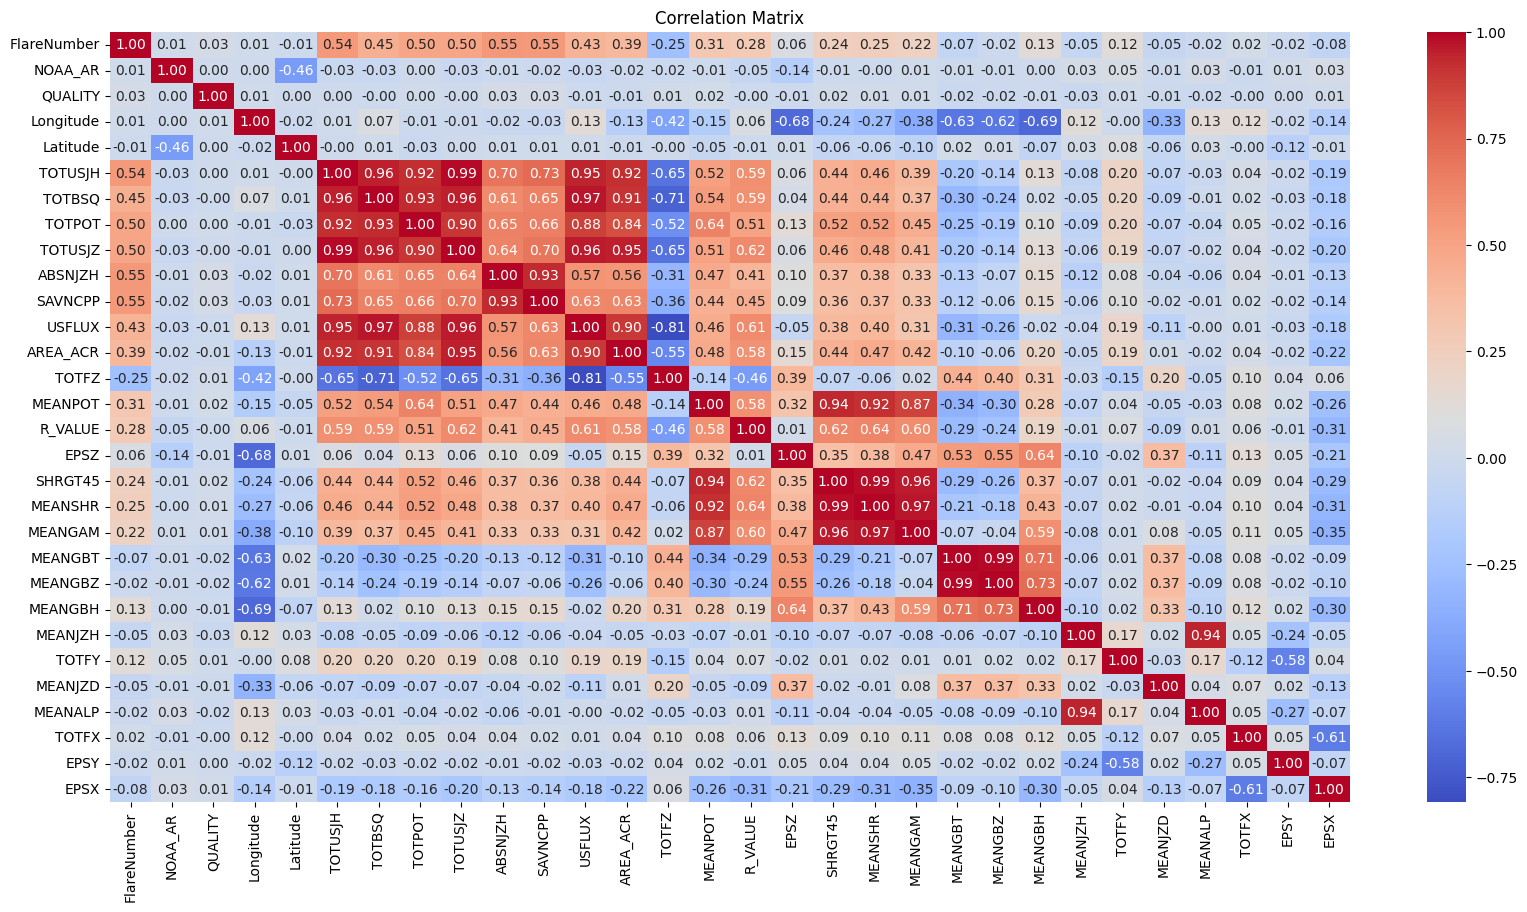

In [9]:
df_features = df.drop(columns=['T_REC'])

# Correlation Analysis
correlation_matrix = df_features.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Looking at the variance of the features, the following have extremely large variance:
- SAVNCPP - Sum of the absolute value of the net magnetic flux in the line-of-sight direction for all sunspots within the active region.
- TOTBSQ, TOTPOT - Total unsigned magnetic flux and total magnetic potential field strength. These give additional information about the magnetic configuration.
- TOTUSJZ - Total unsigned magnetic flux vertical(Z) components. 
- USFLUX - Unsigned magnetic flux.

Standardization of the features will be necessary.

Some features look to be completely uncorrelated such as NOAA_AR and Quality. Given what they represent, and following experimentation, it is safe to drop
- NOAA_AR - This is the unique identifier assigned by the National Oceanic and Atmospheric Administration (NOAA) to a specific active region on the Sun.
- QUALITY - Denotes the quality of the observation or measurement for that active region, indicating the level of confidence in the data.

In [10]:
df = df.drop(columns=['NOAA_AR', 'QUALITY'])

In [11]:
# Variance
print("Variance of features:\n", df_features.var().sort_values(ascending=False))

Variance of features:
 TOTPOT         1.086290e+47
USFLUX         1.965143e+44
TOTUSJZ        4.025789e+26
SAVNCPP        5.235584e+25
TOTBSQ         4.135445e+20
MEANPOT        1.829331e+07
TOTFX          9.073599e+06
TOTFZ          4.516002e+06
QUALITY        2.999972e+06
TOTFY          2.340043e+06
TOTUSJH        1.161800e+06
AREA_ACR       3.733047e+05
NOAA_AR        2.508833e+05
ABSNJZH        4.250871e+04
MEANGBT        5.495061e+02
MEANGBZ        5.241473e+02
Longitude      3.612844e+02
SHRGT45        2.784656e+02
MEANGBH        2.189341e+02
MEANGAM        1.051497e+02
MEANSHR        8.142881e+01
Latitude       4.260223e+01
R_VALUE        2.831031e+00
MEANJZD        2.320513e-01
FlareNumber    4.074921e-02
EPSZ           2.952897e-02
EPSX           2.415772e-02
EPSY           8.298247e-03
MEANALP        3.967820e-04
MEANJZH        5.067275e-05
dtype: float64


Pairwise plots of R_VALUE (complexity of the magnetic field) versus TOTBSQ (Total magnetic flux) and TOTPOT (Total magnetic potential field strength), confirm that there is a strong correlation. 

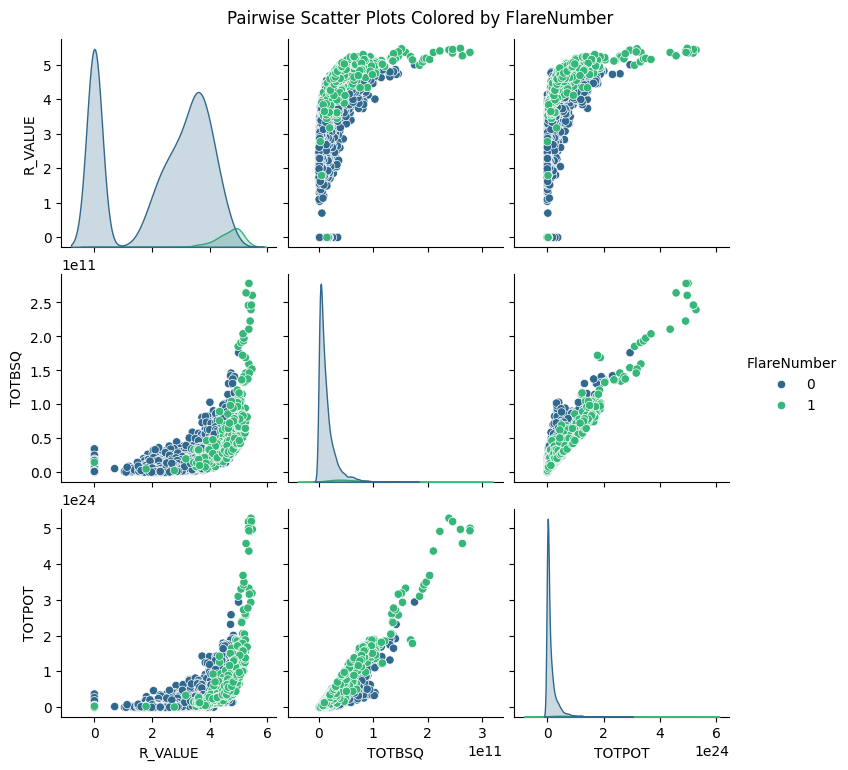

In [12]:
df_reduced = df[['FlareNumber', 'R_VALUE', 'TOTBSQ', 'TOTPOT', ]]

# Create pairplot with hue set to 'FlareNumber'
sns.pairplot(df_reduced, hue='FlareNumber', diag_kind='kde', palette='viridis')
plt.suptitle('Pairwise Scatter Plots Colored by FlareNumber', y=1.02)
plt.show()

Given that this is an unbalanced data set, I experiment with over and under sampling

#### Oversample and split data set into Train and Test

In [13]:
X = df.drop(columns=['FlareNumber', 'T_REC'])
y = df['FlareNumber']

ros = RandomOverSampler(random_state=42)
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over_resampled, y_over_resampled, test_size=0.2, random_state=42)

print('Oversampled dataset value counts %s' % y_over_resampled.value_counts())

Oversampled dataset value counts FlareNumber
0    8482
1    8482
Name: count, dtype: int64


#### Undersample and split data set into Train and Test

In [14]:
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under_resampled, y_under_resampled, test_size=0.2, random_state=42)
print('Undersampled dataset value counts %s' % y_under_resampled.value_counts())

Undersampled dataset value counts FlareNumber
0    377
1    377
Name: count, dtype: int64


#### Split data set without over/under sampling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Undersampled dataset value counts %s' % y.value_counts())

Undersampled dataset value counts FlareNumber
0    8482
1     377
Name: count, dtype: int64


### Standardise Data

In [16]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_scaled = scaler.transform(X)

# Over-sampled dataset
X_train_over_scaled = scaler.transform(X_train_over)
X_test_over_scaled = scaler.transform(X_test_over)

# Under-sampled dataset
X_train_under_scaled = scaler.transform(X_train_under)
X_test_under_scaled = scaler.transform(X_test_under)

# Original dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Initial Models

In [17]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


#### Training of models on original & oversampled data results in very high performance measures suggesting overfitting. Under sampled data set used

In [18]:
X_train_tmp = X_train_under_scaled
y_train_tmp = y_train_under
X_test_tmp = X_test_under_scaled
y_test_tmp = y_test_under

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_tmp, y_train_tmp)
    end_time = time.time()
    y_pred = model.predict(X_test_tmp)

    print(f"\n--- {name} ---")
    print(f"Training Time: {end_time - start_time:.4f} seconds")
    print(f"Accuracy: {accuracy_score(y_test_tmp, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test_tmp, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test_tmp, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test_tmp, y_pred, average='weighted'):.4f}")


--- Logistic Regression ---
Training Time: 0.0401 seconds
Accuracy: 0.8675
Precision: 0.8678
Recall: 0.8675
F1-Score: 0.8675

--- SVC ---
Training Time: 0.0121 seconds
Accuracy: 0.8940
Precision: 0.8940
Recall: 0.8940
F1-Score: 0.8940

--- Decision Tree ---
Training Time: 0.0132 seconds
Accuracy: 0.8675
Precision: 0.8686
Recall: 0.8675
F1-Score: 0.8675



--- Random Forest ---
Training Time: 0.2550 seconds
Accuracy: 0.8808
Precision: 0.8811
Recall: 0.8808
F1-Score: 0.8808

--- KNN ---
Training Time: 0.0005 seconds
Accuracy: 0.8808
Precision: 0.8811
Recall: 0.8808
F1-Score: 0.8808

--- Naive Bayes ---
Training Time: 0.0012 seconds
Accuracy: 0.8543
Precision: 0.8605
Recall: 0.8543
F1-Score: 0.8536


### Hyperparameter Tuning - Best Model - Random Forest

In [19]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create the Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    model.fit(X_train_under_scaled, y_train_under)

    # Predict on the test set
    y_pred = model.predict(X_test_under_scaled)

    # Calculate the F1-Score
    f1 = f1_score(y_test_under, y_pred, average='weighted')

    return f1

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=4)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_under_scaled, y_train_under)


[I 2024-10-04 22:36:17,245] A new study created in memory with name: no-name-ab5c24fb-b43a-443d-81de-f608d4de7339
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-10-04 22:36:17,787] Trial 0 finished with value: 0.8741721854304636 and parameters: {'n_estimators': 60, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 4, '

Best hyperparameters: {'n_estimators': 25, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


RandomForestClassifier(max_depth=19, min_samples_split=4, n_estimators=25,
                       random_state=42)

In [20]:
# Predict on the test set
y_pred = best_model.predict(X_test_under_scaled)

# Print the evaluation metrics
print("\n--- Random Forest with Optuna ---")
print(f"Accuracy: {accuracy_score(y_test_under, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_under, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_under, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test_under, y_pred, average='weighted'):.4f}")


--- Random Forest with Optuna ---
Accuracy: 0.9073
Precision: 0.9073
Recall: 0.9073
F1-Score: 0.9073


### Measure performance on entire data set

In [21]:
y_pred = best_model.predict(X_scaled)

# Print the evaluation metrics
print("\n--- Random Forest with full data set ---")
print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y, y, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y, y, average='weighted'):.4f}")


--- Random Forest with full data set ---
Accuracy: 0.8920
Precision: 0.9683
Recall: 1.0000
F1-Score: 1.0000


### Determine the most important features

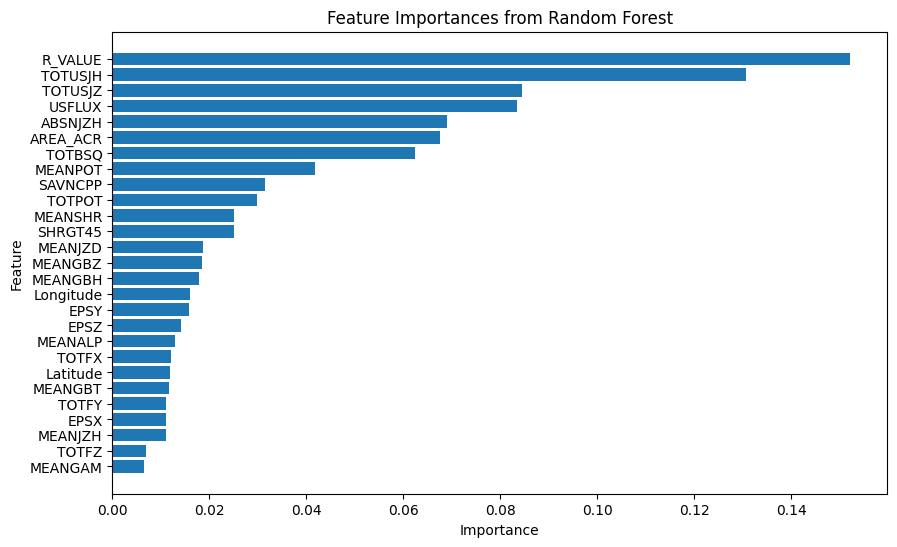

In [22]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
features = X.columns  # Assuming X is a DataFrame
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Conclusions

In conclusion, it appears that the following features have most impact in the prediction of solar flares:
- R_VALUE - Measures the complexity of the magnetic field configuration.
- TOTUSJH, TOTUSJZ - Total unsigned magnetic flux in the horizontal(H) and vertical(Z) components. These provide an overall measure of the magnetic field strength in the active region.